In [2]:
import numpy as np
#from functions import *
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}')

In [3]:
#total_x=np.zeros((0,100))
total_y=np.zeros((100))

for i in range(100):
    test=np.loadtxt('dat_iQPE_err_thresh{}.txt'.format(i),delimiter=',')
    total_y=np.vstack((total_y,test[1,:]))

total_y = np.delete(total_y,0,0)

total=np.zeros((3,100))

test = np.loadtxt("dat_iQPE_err_thresh0.txt",delimiter=',')          #x-Werte
for i in range(np.shape(total)[1]):
    total[0][i] += test[0,i]


for i in range(100):                        #y-Werte und die std davon
    hmm = []
    for j in range(100):
        hmm.append(total_y[j][i])
    total[1][i] = np.mean(hmm)
    total[2][i] = np.std(hmm)/np.sqrt(100)
    
print(total)

[[0.00000000e+00 6.06060606e-03 1.21212121e-02 1.81818182e-02
  2.42424242e-02 3.03030303e-02 3.63636364e-02 4.24242424e-02
  4.84848485e-02 5.45454545e-02 6.06060606e-02 6.66666667e-02
  7.27272727e-02 7.87878788e-02 8.48484848e-02 9.09090909e-02
  9.69696970e-02 1.03030303e-01 1.09090909e-01 1.15151515e-01
  1.21212121e-01 1.27272727e-01 1.33333333e-01 1.39393939e-01
  1.45454545e-01 1.51515152e-01 1.57575758e-01 1.63636364e-01
  1.69696970e-01 1.75757576e-01 1.81818182e-01 1.87878788e-01
  1.93939394e-01 2.00000000e-01 2.06060606e-01 2.12121212e-01
  2.18181818e-01 2.24242424e-01 2.30303030e-01 2.36363636e-01
  2.42424242e-01 2.48484848e-01 2.54545455e-01 2.60606061e-01
  2.66666667e-01 2.72727273e-01 2.78787879e-01 2.84848485e-01
  2.90909091e-01 2.96969697e-01 3.03030303e-01 3.09090909e-01
  3.15151515e-01 3.21212121e-01 3.27272727e-01 3.33333333e-01
  3.39393939e-01 3.45454545e-01 3.51515152e-01 3.57575758e-01
  3.63636364e-01 3.69696970e-01 3.75757576e-01 3.81818182e-01
  3.8787

In [4]:
np.savetxt('result_iQPE_err_thresh.txt', total)

In [5]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#7f7f7f','#17becf', '#8c564b', '#e377c2', '#bcbd22', ]

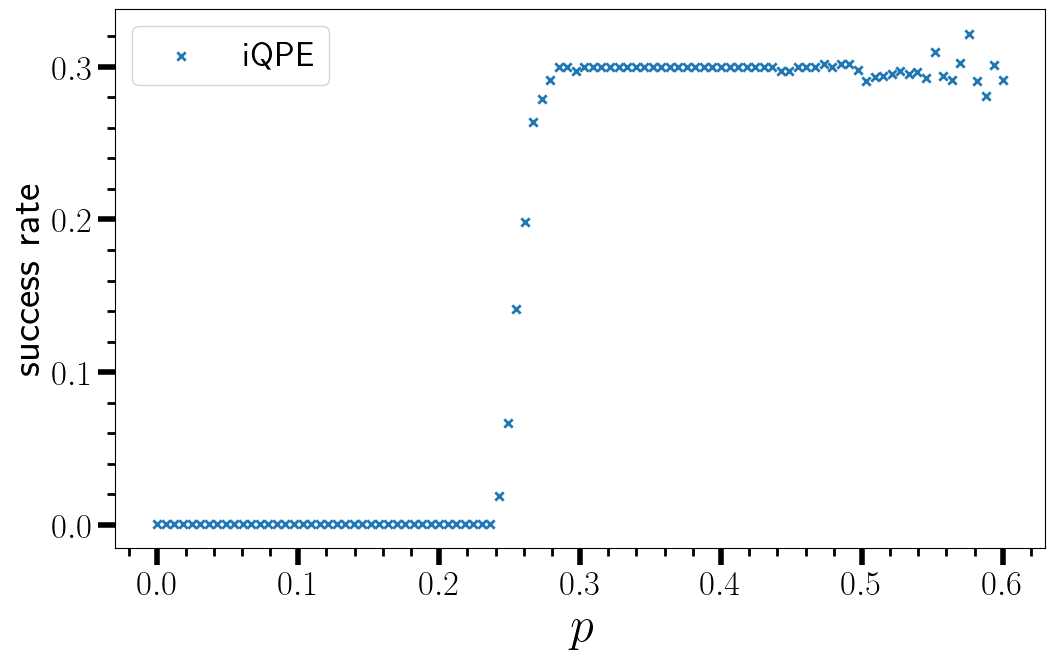

In [6]:
fig, ax = plt.subplots(figsize=(12,7)) #erzeugt plot umgebung

style_dict={'marker': 'x',
     #'size': 10,
     'linewidth': 2}
ax.scatter(total[0],total[1],color=color[0],label='iQPE {}',**style_dict)
#ax.scatter(total[0],total[2],color=color[1],label='no QEC {}',**style_dict) #daten ohne fehlerbalken


#ax.plot(xcont,model(xcont,disopt[0], disopt[1],disopt[2]),label=r'inverse square fit')
ax.set_xlabel(r'$p$',fontsize=35) #name der X-Achse
ax.set_ylabel(r'success rate',fontsize=30) #name der Y-Achse
#ax.set_ylabel(r'$\braket{\mathrm{QCNN}}$',fontsize=30) #name der Y-Achse
ax.legend(loc=0, prop={'size': 25})
#ax.set_xlim((5,90)) #X-Bereich
#ax.set_ylim((-1,50)) #Y-Bereich

#plt.title('Combined Plot'.format(layer),fontsize=35)

plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=25)
ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=25)
#ax.yaxis.set_ticks(np.arange(0, 1700, 100))
#ax.xaxis.set_ticks(np.arange(0, 20, 1))
#plt.vlines(0.027,0.5,1)
plt.autoscale()
#ax.set_xlim((-0.002,0.008))
#ax.set_ylim((0.85,1.01))
#plt.grid() #erzeugt grid
plt.show() #erzeugt plot

fig.savefig('total_R_p.png', bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand

In [7]:
N=100

tables=np.ndarray(N,dtype='object')
for i in range(N):
    tables[i]=pd.read_table('iQPE_2nd_step_100shots_ideal_magic_me_{}.txt'.format(i), sep=',',names=['px','rateQEC','rate'], index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: 'iQPE_2nd_step_100shots_ideal_magic_me_0.txt'

In [ ]:
tables[78]

,layer,PZ,PX,PY,X_count_X,N_X,X_count_Z,N_Z
0,0.0,0.0,0.0,0.00,0.0,65536.0,0.0,65536.0
1,1.0,0.0,0.0,0.00,0.0,16384.0,0.0,16384.0
2,2.0,0.0,0.0,0.00,0.0,4096.0,0.0,4096.0
3,3.0,0.0,0.0,0.00,0.0,1024.0,0.0,1024.0
4,4.0,0.0,0.0,0.00,0.0,256.0,0.0,256.0
...,...,...,...,...,...,...,...,...
895,4.0,0.0,0.0,0.07,122.0,256.0,128.0,256.0
896,5.0,0.0,0.0,0.07,32.0,64.0,34.0,64.0
897,6.0,0.0,0.0,0.07,4.0,16.0,8.0,16.0
898,7.0,0.0,0.0,0.07,2.0,4.0,2.0,4.0


In [ ]:
nrows=900
nsets=300
data_red=pd.DataFrame()
data_red['layer']=tables[0]['layer']
data_red['PX']=tables[0]['PX']
data_red['PZ']=tables[0]['PZ']
data_red['PY']=tables[0]['PY']

#data_red['PY']=s1['PY']
count_arr=np.zeros(nrows)
ratio_arr=np.zeros(nrows)
ratioX_arr=np.zeros(nrows)
ratioZ_arr=np.zeros(nrows)
count_err_arr=np.zeros(nrows)
ratio_err_arr=np.zeros(nrows)
ratioX_err_arr=np.zeros(nrows)
ratioZ_err_arr=np.zeros(nrows)
order_arr=np.zeros(nrows)
order_err_arr=np.zeros(nrows)
sample_arr=np.zeros(nrows)

for i in range(nrows):
    counts=np.zeros(nsets)
    ratios=np.zeros(nsets)
    orders=np.zeros(nsets)
    ratio_X=np.zeros(nsets)
    ratio_Z=np.zeros(nsets)
    for j in range(nsets):
        counts[j]=tables[j]['X_count_X'].iloc[i]+tables[j]['X_count_Z'].iloc[i]
        counts_X=tables[j]['X_count_X'].iloc[i]
        counts_Z=tables[j]['X_count_Z'].iloc[i]
        #print(j)

        ratios[j]= counts[j]/(tables[j]['N_X'].iloc[i]*2)
        ratio_X[j]=counts_X/tables[j]['N_X'].iloc[i]
        ratio_Z[j]=counts_Z/tables[j]['N_Z'].iloc[i]
        if tables[j]['X_count_X'].iloc[i]!=0 or tables[j]['X_count_Z'].iloc[i]!=0:
            orders[j]=-1
        else:
            orders[j]=1
    
    count_mean=counts.mean()
    
    count_err=counts.std()/np.sqrt(nsets)
    
    rat_mean=ratios.mean()
    X_mean=ratio_X.mean()
    Z_mean=ratio_Z.mean()
    X_err=ratio_X.std()/np.sqrt(nsets)
    Z_err=ratio_Z.std()/np.sqrt(nsets)

    rat_std=ratios.std()
    ratio_err=rat_std/np.sqrt(nsets)
    
    order_mean=orders.mean()
    order_std=orders.std()
    order_err=order_std/np.sqrt(nsets)
    
    count_arr[i]=count_mean
    count_err_arr[i]=count_err
    ratio_arr[i]=rat_mean
    ratioX_arr[i]=X_mean
    ratioZ_arr[i]=Z_mean
    ratio_err_arr[i]=ratio_err
    ratioX_err_arr[i]=X_err
    ratioZ_err_arr[i]=Z_err
    order_arr[i]=order_mean
    order_err_arr[i]=order_err
    
    
    #sample_arr[i]=(2*order_std/(order_mean))**2
    #sample_arr[i]=(1.96**2)/(np.arcsin(np.sqrt(0.5*(order_mean+1)))-np.sqrt(np.arcsin(0.5)))**2
    sample_arr[i]=(1.96**2)/(np.arcsin(np.sqrt((-2*rat_mean+1)))-np.sqrt(np.arcsin(0.82)))**2

    
data_red['counts']=count_arr
data_red['counts_err']=count_err_arr
data_red['ratio']=ratio_arr
data_red['ratio_err']=ratio_err_arr
data_red['ratioX']=ratioX_arr
data_red['Xerr']=ratioX_err_arr
data_red['ratioZ']=ratioZ_arr
data_red['Zerr']=ratioZ_err_arr
data_red['sample_compl']=sample_arr
data_red['order']=order_arr
data_red['order_err']=order_err_arr
data_red

,layer,PX,PZ,PY,counts,counts_err,ratio,ratio_err,ratioX,Xerr,ratioZ,Zerr,sample_compl,order,order_err
0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,11.025418,1.000000,0.000000
1,1.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,11.025418,1.000000,0.000000
2,2.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,11.025418,1.000000,0.000000
3,3.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,11.025418,1.000000,0.000000
4,4.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,11.025418,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,4.0,0.0,0.07,0.0,127.106667,0.467150,0.248255,0.000912,0.0,0.0,0.496510,0.001825,104.615153,-1.000000,0.000000
896,5.0,0.0,0.07,0.0,32.206667,0.236812,0.251615,0.001850,0.0,0.0,0.503229,0.003700,97.647722,-1.000000,0.000000
897,6.0,0.0,0.07,0.0,7.880000,0.115262,0.246250,0.003602,0.0,0.0,0.492500,0.007204,109.135648,-1.000000,0.000000
898,7.0,0.0,0.07,0.0,2.073333,0.059103,0.259167,0.007388,0.0,0.0,0.518333,0.014776,84.313981,-0.773333,0.036604


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_red)

     layer   PX   PZ        PY        counts  counts_err     ratio  ratio_err  \
0      0.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
1      1.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
2      2.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
3      3.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
4      4.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
5      5.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
6      6.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
7      7.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
8      8.0  0.0  0.0  0.000000      0.000000    0.000000  0.000000   0.000000   
9      0.0  0.0  0.0  0.000707    370.433333    2.217230  0.002826   0.000017   
10     1.0  0.0  0.0  0.000707    184.153333    1.341396  0.005620   0.000041   
11     2.0  0.0  0.0  0.0007

In [ ]:
plots={}
for i in range(8):
    plots[i]=pd.DataFrame()
    layer=i
    plots[i]['pz']=data_red.PZ[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]#[ data_red.PY==0.00]
    plots[i]['ratio']=-2*data_red.ratio[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]+1#[ data_red.PY==0.00]
    plots[i]['ratioX']=-2*data_red.ratioX[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]+1#[ data_red.PY==0.00]
    plots[i]['ratioZ']=-2*data_red.ratioZ[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]+1#[ data_red.PY==0.00]
    plots[i]['err']=data_red.ratio_err[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]#[ data_red.PY==0.00]
    plots[i]['Xerr']=2*data_red.Xerr[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]#[ data_red.PY==0.00]
    plots[i]['Zerr']=2*data_red.Zerr[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]#[ data_red.PY==0.00]
    plots[i]['sampling']=data_red.sample_compl[data_red.layer==layer][data_red.PX==0.00]#[ data_red.PY==0.00]
    plots[i]['order']=data_red.order[data_red.layer==layer][data_red.PX==0.00]
    plots[i]['order_err']=data_red.order_err[data_red.layer==layer][data_red.PX==0.00]
   

# plots={}
# for i in range(8):
#     plots[i]=pd.DataFrame()
#     layer=i
#     #plots[i]['pz']=data_red.PZ[data_red.layer==layer][data_red.PX==0.00][data_red.PY==0.00]#[ data_red.PY==0.00]
#     plots[i]['py']=data_red.PY[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#     plots[i]['ratio']=data_red.ratio[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#     #plots[i]['ratioX']=-2*data_red.ratioX[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]+1#[ data_red.PY==0.00]
#     #plots[i]['ratioZ']=-2*data_red.ratioZ[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]+1#[ data_red.PY==0.00]
#     plots[i]['err']=data_red.ratio_err[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#     #plots[i]['Xerr']=2*data_red.Xerr[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#     #plots[i]['Zerr']=2*data_red.Zerr[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#    # plots[i]['sampling']=data_red.sample_compl[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]#[ data_red.PY==0.00]
#     #plots[i]['order']=data_red.order[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]
#     #plots[i]['order_err']=data_red.order_err[data_red.layer==layer][data_red.PX==0.00][data_red.PZ==0.00]




In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#7f7f7f','#17becf', '#8c564b', '#e377c2', '#bcbd22', ]

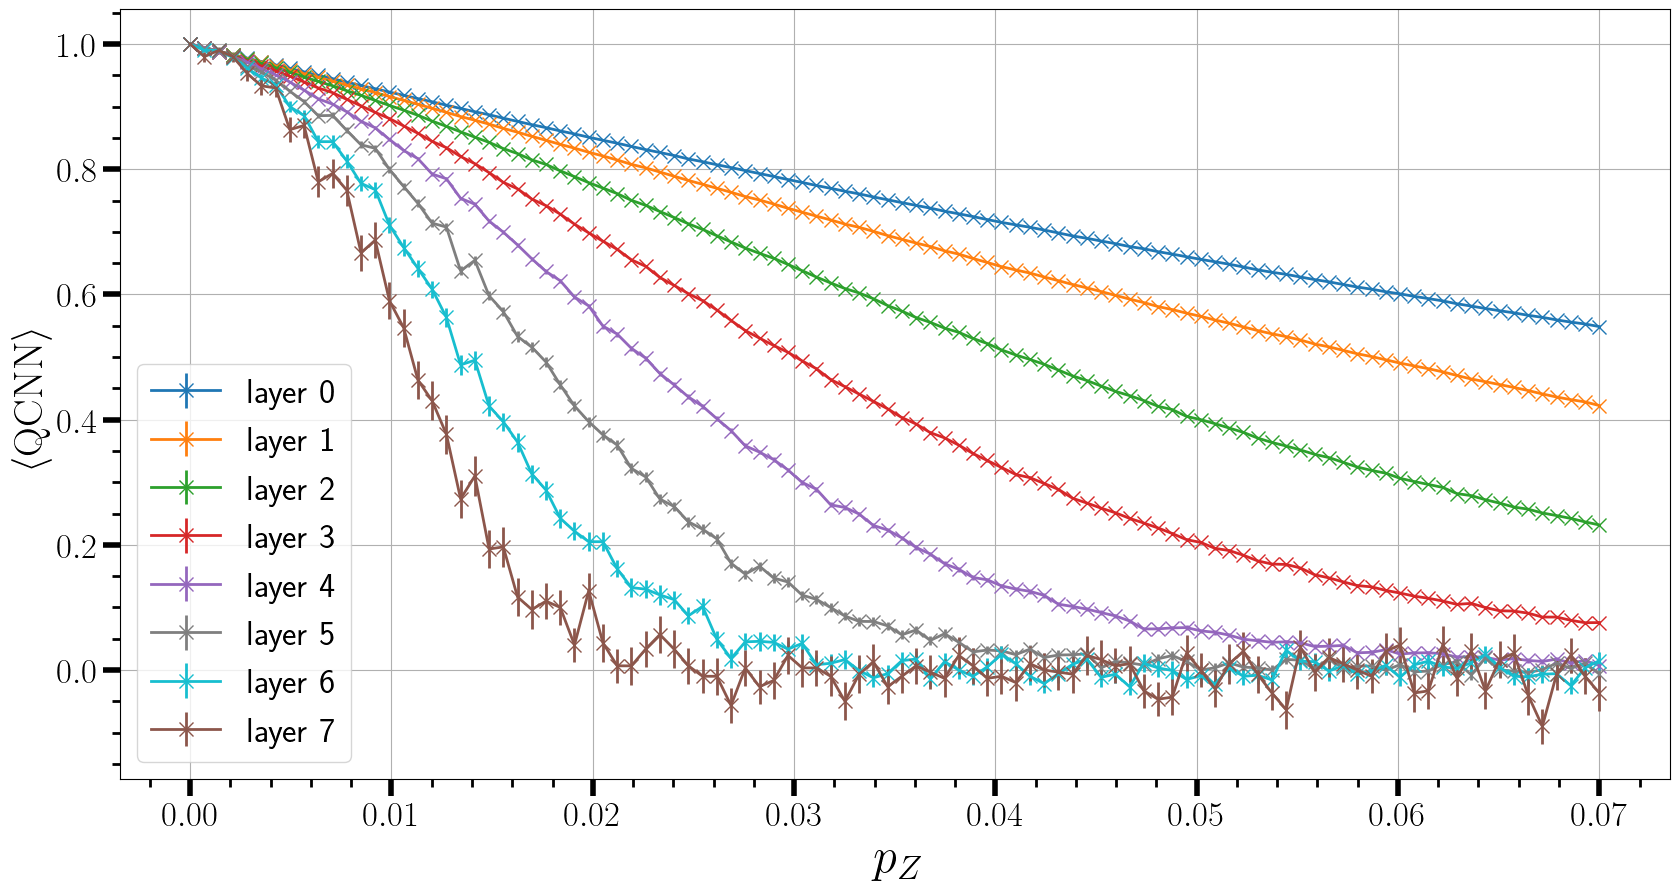

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) #erzeugt plot umgebung

style_dict={'fmt': 'x-',
     'markersize': 10,
     'linewidth': 2}
N_layers=8
for i in range(N_layers):
    #ax.errorbar(plots[i].pz,plots[i].ratio,color=color[i],yerr=plots[i].err,label='layer {}'.format(i),**style_dict) #daten ohne fehlerbalken
    #ax.errorbar(plots[i].pz,plots[i].ratioX,color=color[i],yerr=plots[i].Xerr,label='X-layer {}'.format(i),**style_dict) #daten ohne fehlerbalken
    ax.errorbar(plots[i].pz,plots[i].ratioZ,color=color[i],yerr=plots[i].Zerr,label='layer {}'.format(i),**style_dict) #daten ohne fehlerbalken


#ax.plot(xcont,model(xcont,disopt[0], disopt[1],disopt[2]),label=r'inverse square fit')
ax.set_xlabel(r'$p_Z$',fontsize=35) #name der X-Achse
#ax.set_ylabel(r'$1-\frac{1}{N_\mathrm{q}}\sum_j{m_j}$',fontsize=30) #name der Y-Achse
ax.set_ylabel(r'$\braket{\mathrm{QCNN}}$',fontsize=30) #name der Y-Achse
ax.legend(loc=0, prop={'size': 25})
#ax.set_xlim((5,90)) #X-Bereich
#ax.set_ylim((-1,50)) #Y-Bereich

#plt.title('Combined Plot'.format(layer),fontsize=35)

plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=25)
ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=25)
#ax.yaxis.set_ticks(np.arange(0, 1700, 100))
#ax.xaxis.set_ticks(np.arange(0, 20, 1))
#plt.vlines(0.027,0.5,1)
plt.autoscale()
#ax.set_xlim((-0.002,0.004))
#ax.set_ylim((0.8,1.05))
plt.grid() #erzeugt grid
plt.show() #erzeugt plot

fig.savefig('combined_squarePooling.png'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand


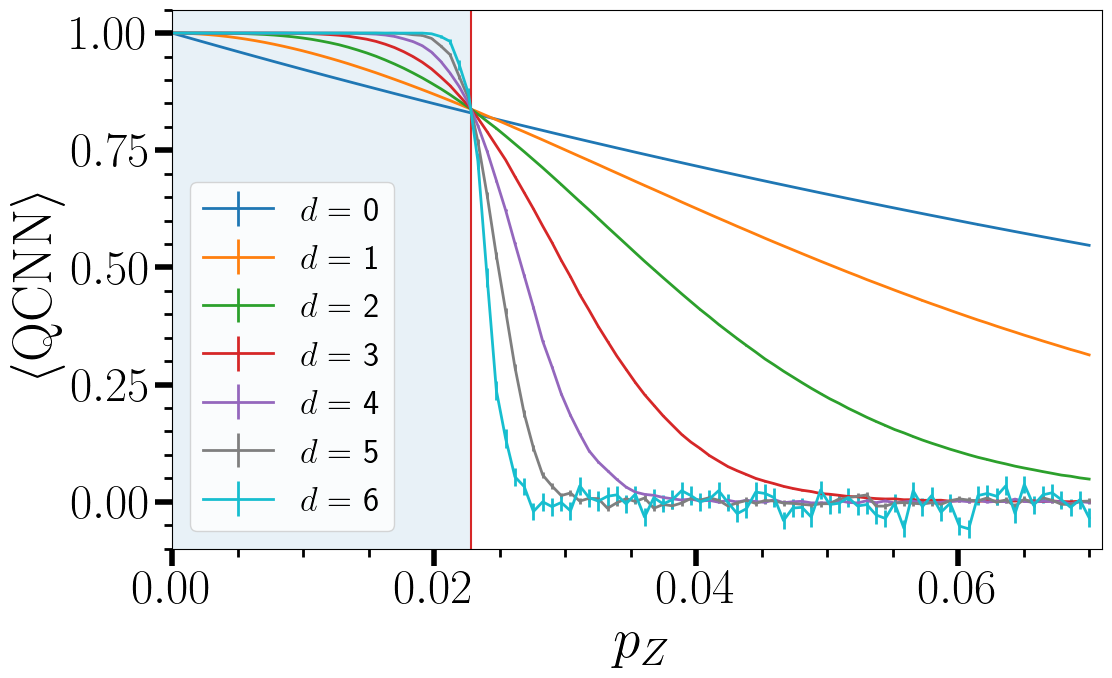

In [ ]:
fig, ax = plt.subplots(figsize=(12,7)) #erzeugt plot umgebung

style_dict={'fmt': '-',
     'markersize': 10,
     'linewidth': 2}
N_layers=7
for i in range(N_layers):
    #ax.errorbar(plots[i].pz,plots[i].ratio,color=color[i],yerr=plots[i].err,label='layer {}'.format(i),**style_dict) #daten ohne fehlerbalken
    #ax.errorbar(plots[i].pz,plots[i].ratioX,color=color[i],yerr=plots[i].Xerr,label='X-layer {}'.format(i),**style_dict) #daten ohne fehlerbalken
    ax.errorbar(plots[i].pz,plots[i].ratioZ,color=color[i],yerr=plots[i].Zerr,label='$d=$ {}'.format(i),**style_dict) #daten ohne fehlerbalken


#ax.plot(xcont,model(xcont,disopt[0], disopt[1],disopt[2]),label=r'inverse square fit')
ax.set_xlabel(r'$p_Z$',fontsize=40) #name der X-Achse
#ax.set_ylabel(r'$1-\frac{1}{N_\mathrm{q}}\sum_j{m_j}$',fontsize=30) #name der Y-Achse
ax.set_ylabel(r'$\braket{\mathrm{QCNN}}$',fontsize=40) #name der Y-Achse
ax.legend(loc=0, prop={'size': 25})
#ax.set_xlim((5,90)) #X-Bereich
#ax.set_ylim((-1,50)) #Y-Bereich

#plt.title(r'QCNN output'.format(layer),fontsize=40)

plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=35)
ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=35)
ax.fill_between([0,0.0228],1.2,-0.2,alpha=0.1)#,color='blue')
plt.vlines(0.0228, -0.35,1.1,color=color[3])
#ax.yaxis.set_ticks(np.arange(0, 1700, 100))
#ax.xaxis.set_ticks(np.arange(0, 20, 1))
#plt.vlines(0.027,0.5,1)
plt.autoscale()
ax.set_xlim((0,0.071))
ax.set_ylim((-0.1,1.05))
#plt.grid() #erzeugt grid
plt.show() #erzeugt plot

fig.savefig('combined_squarePooling.pdf'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand

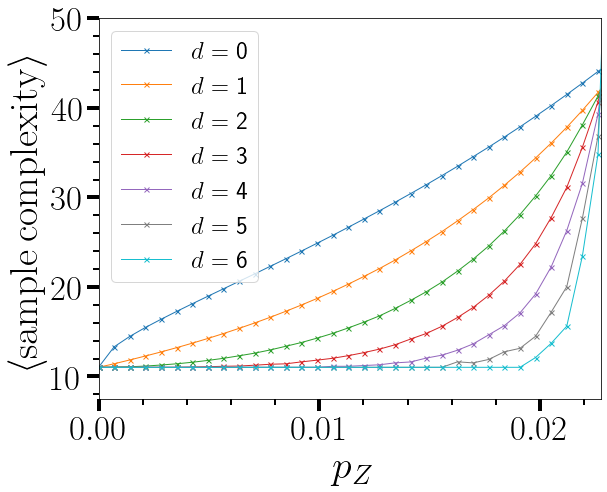

In [ ]:
fig, ax = plt.subplots(figsize=(9,7)) #erzeugt plot umgebung

style_dict={'marker': 'x',
     'markersize': 5,
     'linewidth': 1}
N_layers=7
for i in range(N_layers):
    if i!=10:
        ax.plot(plots[i].pz,plots[i].sampling,color=color[i],label='$d=$ {}'.format(i),**style_dict) #daten ohne fehlerbalken
    

#ax.plot(xcont,model(xcont,disopt[0], disopt[1],disopt[2]),label=r'inverse square fit')
ax.set_xlabel(r'$p_Z$',fontsize=40) #name der X-Achse
ax.set_ylabel(r'$\braket{\mathrm{sample\,complexity}}$',fontsize=40) #name der Y-Achse
ax.legend(loc=0, prop={'size': 25})
#ax.set_xlim((5,90)) #X-Bereich


#plt.title(r'Sample Complexity'.format(layer),fontsize=40)

plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=35)
ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=35)
#ax.yaxis.set_ticks(np.arange(0, 1700, 100))
#ax.xaxis.set_ticks(np.arange(0, 20, 1))

#plt.yscale('log')
plt.autoscale()
ax.set_ylim((7.5,50)) #Y-Bereich
ax.set_xlim(0,0.02275)
#plt.grid() #erzeugt grid
plt.show() #erzeugt plot

fig.savefig('sampling_square7lays.pdf'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand

In [ ]:
def logistic(x,L,k,x0):
    return L/(1+np.exp(-k*(x-x0)))+0.75
def lin(x,a,b):
    return a*x+b

#params=[0.5,1,0.03]
params=[1,-500,0.024]

N=7

fit_dict={}
for i in range(0,N):
    layer=i
    dictio={}
    sample=plots[i]
    x_def=np.linspace(0,0.06,300)

    res,cov=opt.curve_fit(logistic,sample.pz,sample.ratio, p0=params)
    #print(res)
    dictio['L']=res[0]
    L=dictio['L']
    dictio['L_err']=np.sqrt(cov[0][0])
    L_err=dictio['L_err']
    dictio['k']=res[1]
    k=dictio['k']
    dictio['k_err']=np.sqrt(cov[1][1])
    k_err=dictio['k_err']
    
    dictio['x0']=res[2]
    
    #derivative=L/k*logistic(x0,L,k,x0)*(L*-logistic(x0,L,k,x0))
    dictio['der']= (dictio['L']*dictio['k'])/4
    dictio['der_err']=np.sqrt((k/4)**2*L_err**2+(L/4)**2*k_err**2)
    
    dictio['t']=logistic(dictio['x0'],dictio['L'],dictio['k'],dictio['x0'])-dictio['der']*dictio['x0']
    dictio['t_err']=np.sqrt((0.5*cov[0][0])**2 + (cov[2][2])**2)
    dictio['thresh']=(1-dictio['t'])/dictio['der']
    dictio['thres_err']=np.sqrt((1/dictio['der'])**2*dictio['t_err']**2 + ((1-dictio['t'])*(1/dictio['der']**2))**2*dictio['der_err']**2)
    fit_dict[i]=dictio




In [ ]:
print(fit_dict[6])

{'L': 0.24851301829298914, 'L_err': 0.036305108531762054, 'k': -2993.901731836304, 'k_err': 7678.215400799238, 'x0': 0.023126060516311515, 'der': -186.0058889628118, 'der_err': 477.8074411285709, 't': 5.175839953690801, 't_err': 0.0006590311888117814, 'thresh': 0.022450041646400118, 'thres_err': 0.05766912559787622}


In [ ]:
crossover={}
counter=0
for i in range(1,N):
    for j in range(2,N):
        if j>i:
            crossover[counter]={}
            crossover[counter]['pairing']='{},{}'.format(i,j)
            def funct(x):
                return np.abs(logistic(x, fit_dict[i]['L'],fit_dict[i]['k'],fit_dict[i]['x0'])-logistic(x, fit_dict[j]['L'],fit_dict[j]['k'],fit_dict[j]['x0']))
            mini=opt.minimize(funct,0.3,bounds=[(0.029,0.031)],tol=0.0000000000000000001)
            crossover[counter]['res']=mini.x
            crossover[counter]['success']=mini.success
            counter=counter+1

points=np.zeros(len(crossover))
for i in crossover:
    points[i]=crossover[i]['res']
print(points)
cross_mean=points.mean()
cross_err=points.std()/np.sqrt(len(crossover))
print('crossover point:   ', cross_mean, '  +-  ', cross_err)


#for i in range(nrows):
#    for j in range(nsets):
#sample_arr[i]=(1.96**2)/(np.arcsin(np.sqrt(0.5*(order_mean+1)))-np.sqrt(np.arcsin(0.027367505356618)))**2
#data['sample_compl']=sample_arr

[0.029 0.031 0.031 0.031 0.031 0.031 0.031 0.031 0.031 0.031 0.031 0.031
 0.031 0.031 0.031]
crossover point:    0.030866666666666678   +-   0.00012881223774390598


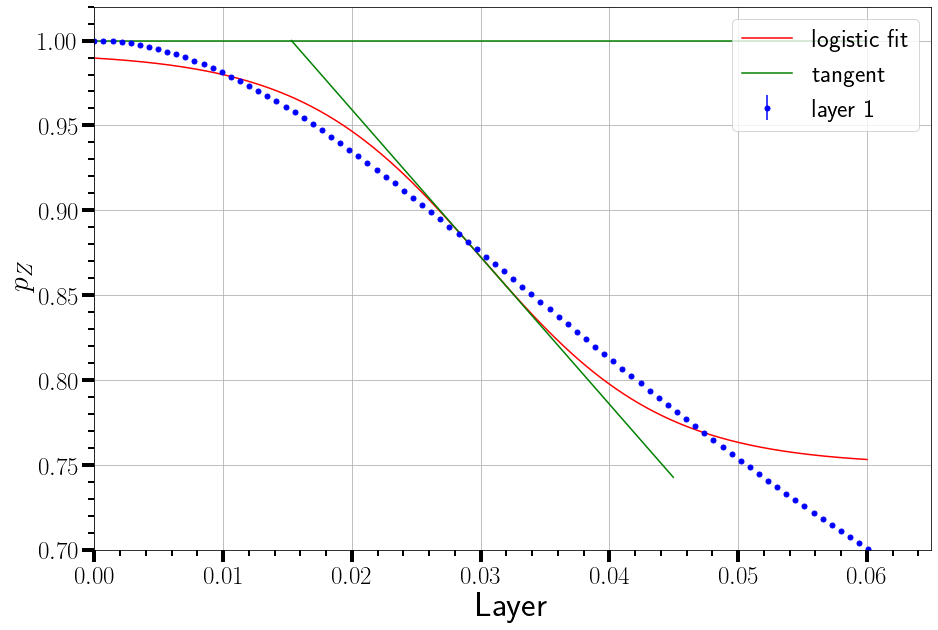

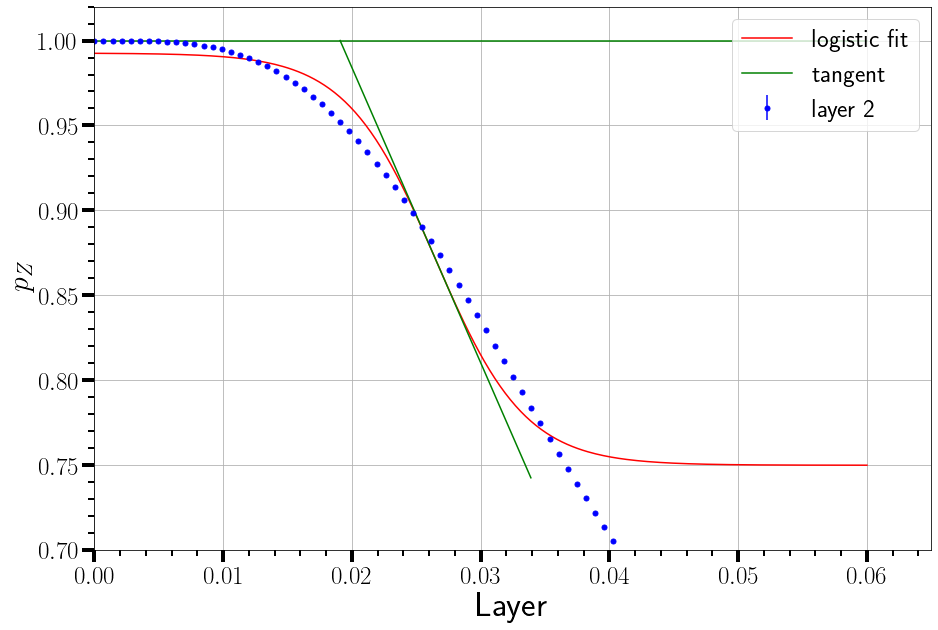

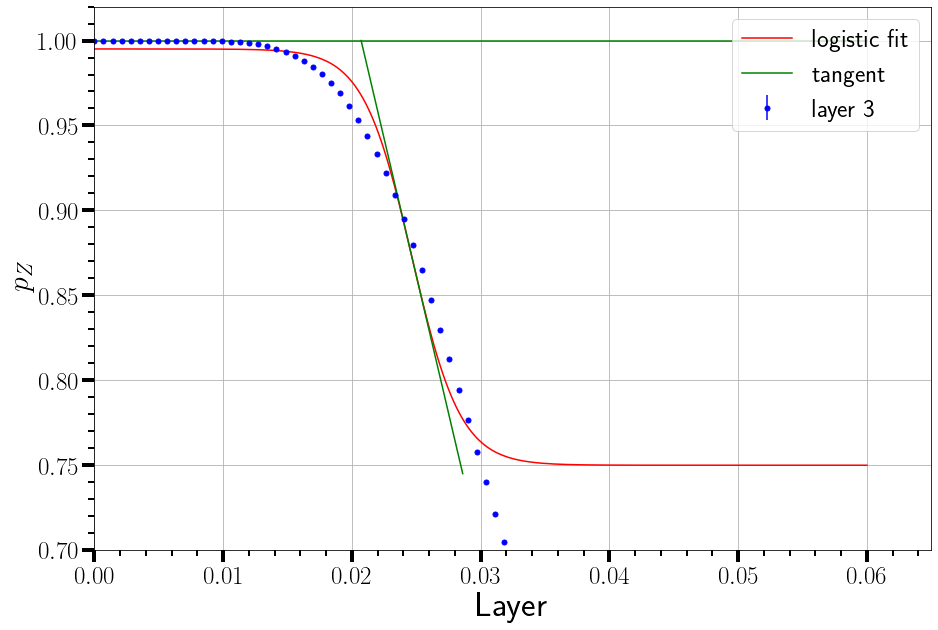

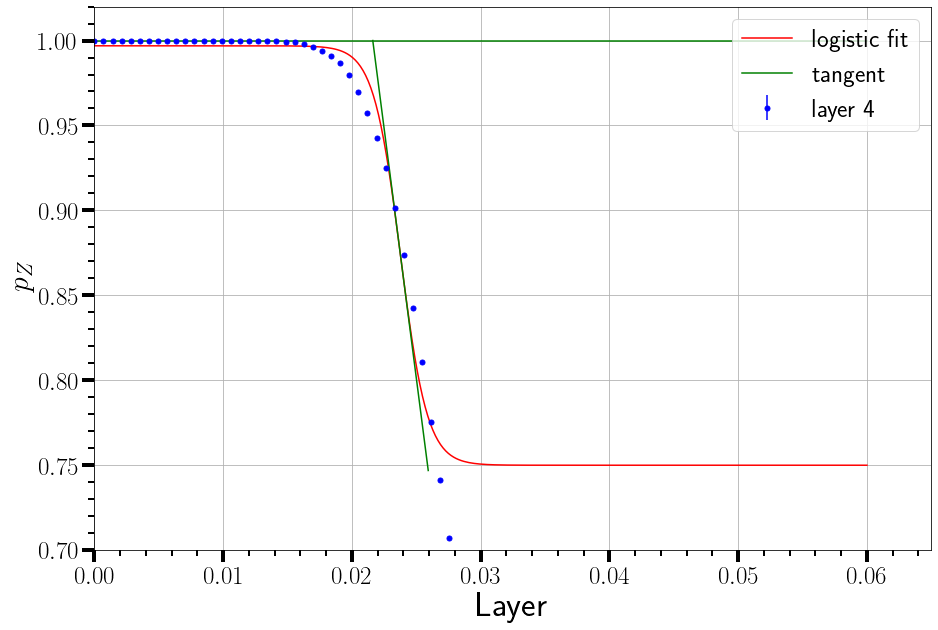

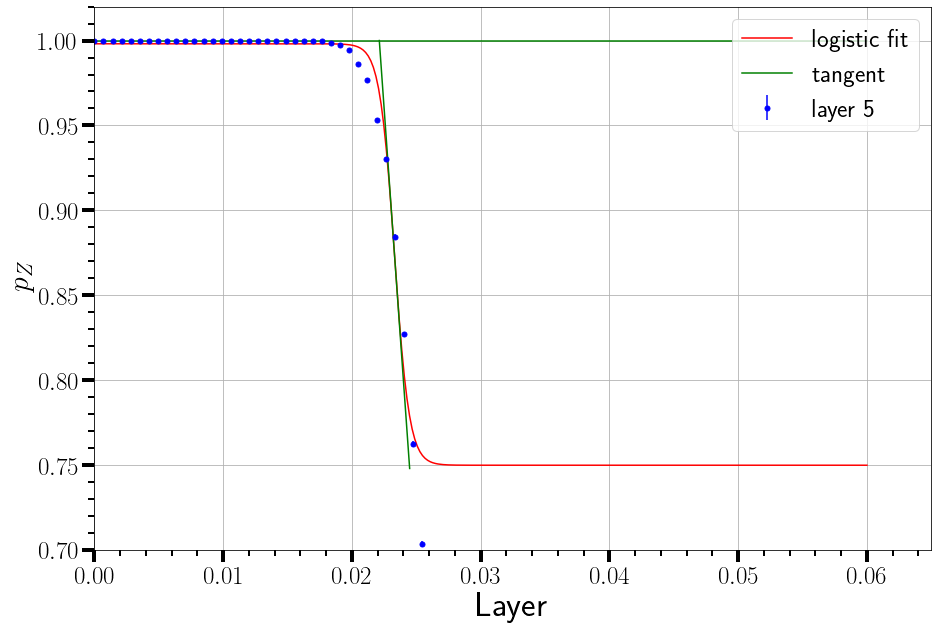

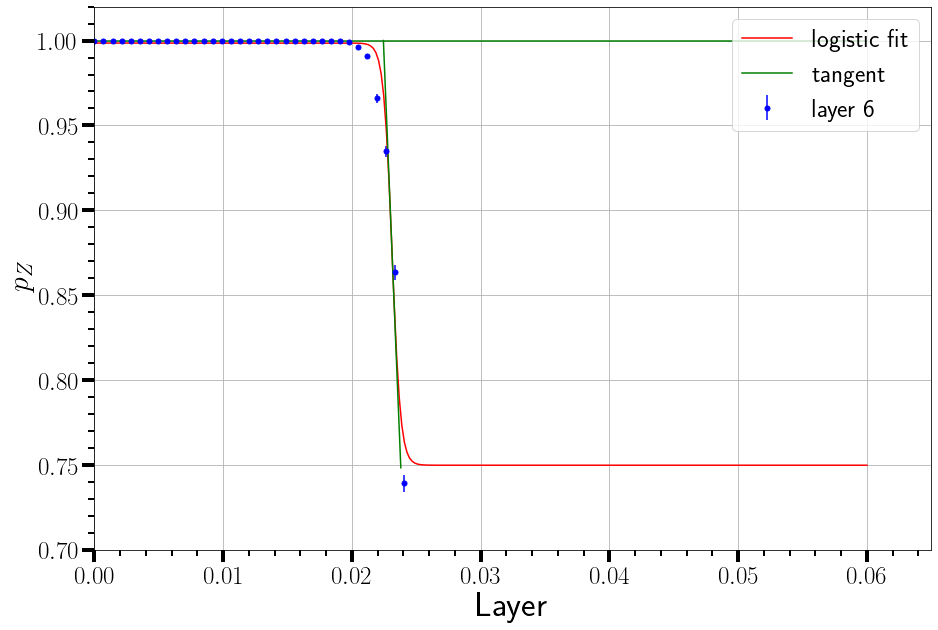

In [ ]:
for i in range(1,N):
    fig, ax = plt.subplots(figsize=(15,10)) #erzeugt plot umgebung
    sample=plots[i]
    layer=i
    ax.errorbar(sample.pz,sample.ratio,fmt='o',color='blue',markersize=5,yerr=sample.err,label='layer {}'.format(layer))
    L=fit_dict[i]['L']
    k=fit_dict[i]['k']
    x0=fit_dict[i]['x0']
    thresh=fit_dict[i]['thresh']
    derivative=fit_dict[i]['der']
    t=fit_dict[i]['t']
    ax.plot(x_def,logistic(x_def,L,k,x0),color='red',label='logistic fit')


    x_def_lin=np.linspace(thresh,x0+x0-thresh,100)

    ax.plot(x_def_lin,lin(x_def_lin,derivative,t),color='green',label='tangent')
    ax.plot(x_def,np.ones(300),color='green')


    ax.set_xlabel(r'Layer',fontsize=35) #name der X-Achse
    ax.set_ylabel(r'$p_Z$',fontsize=30) #name der Y-Achse
    ax.legend(loc=1, prop={'size': 25})

    #

    #plt.title('Layer {}'.format(layer),fontsize=35)

    plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
    ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=25)
    ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=25)
    #ax.yaxis.set_ticks(np.arange(0, 1700, 100))
    #ax.xaxis.set_ticks(np.arange(0, 20, 1))
    plt.autoscale()
    ax.set_xlim((0,0.065)) #X-Bereich
    ax.set_ylim((0.7,1.02)) #Y-Bereich
    #plt.vlines(thresh, 0.5,1.)
    plt.grid() #erzeugt grid
    plt.show() #erzeugt plot

    fig.savefig('thresholds{}.png'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand

In [ ]:

thresholds=np.zeros(N)
thresholds_err=np.zeros(N)
layers=np.arange(N)
for i in range(N):
    thresholds[i]=fit_dict[i]['thresh']
    thresholds_err[i]=fit_dict[i]['thres_err']
thresholds_err


array([2.11555484e-05, 2.02496716e-03, 9.94225076e-03, 1.98678707e-02,
       3.01986570e-02, 4.28188869e-02, 5.76691256e-02])

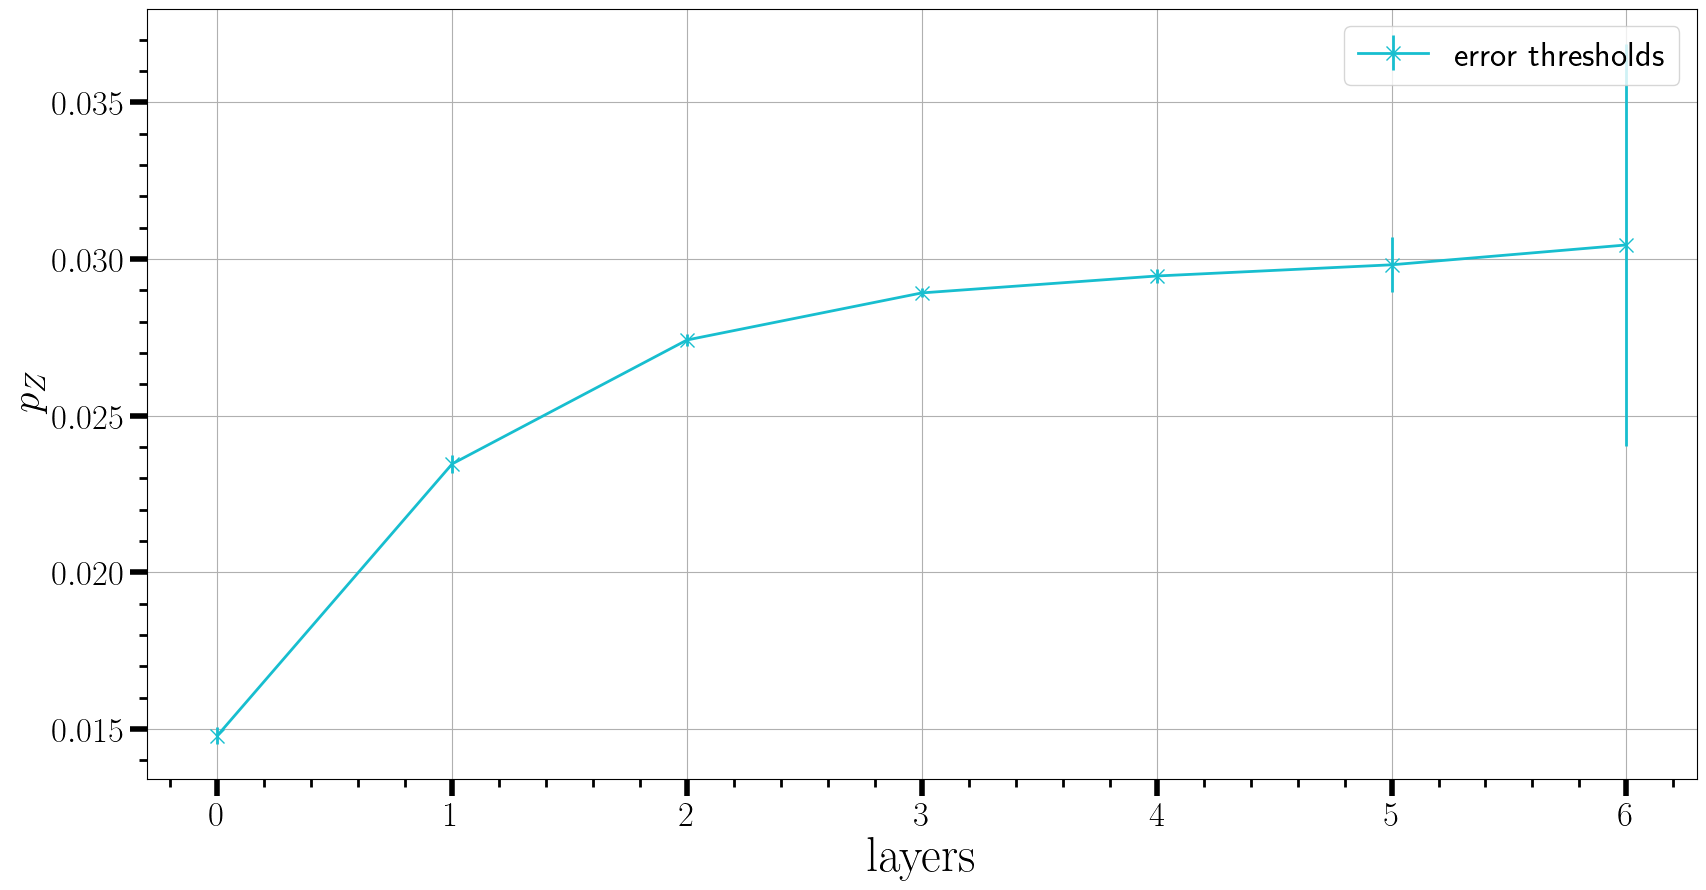

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) #erzeugt plot umgebung

style_dict={'fmt': 'x-',
     'markersize': 10,
     'linewidth': 2}
N_layers=4
ax.errorbar(layers,thresholds,color=color[i],yerr=thresholds_err,label='error thresholds',**style_dict) #daten ohne fehlerbalken
    

ax.set_xlabel(r'$\mathrm{layers}$',fontsize=35) #name der X-Achse
ax.set_ylabel(r'$p_Z$',fontsize=30) #name der Y-Achse
ax.legend(loc=0, prop={'size': 25})
#ax.set_xlim((5,90)) #X-Bereich
#ax.set_ylim((-1,50)) #Y-Bereich

#plt.title('Combined Plot'.format(layer),fontsize=35)

plt.minorticks_on() #erzeugt auch kleine ticks zwischen den großen
ax.tick_params(axis='both',which='major', length=12, width=4, labelsize=25)
ax.tick_params(axis='both',which='minor', length=6, width=2, labelsize=25)
#ax.yaxis.set_ticks(np.arange(0, 1700, 100))
#ax.xaxis.set_ticks(np.arange(0, 20, 1))
#plt.vlines(0.027,0.5,1)
plt.autoscale()
#ax.set_xlim((-0.002,0.06))
plt.grid() #erzeugt grid
plt.show() #erzeugt plot

fig.savefig('err_thresholds.png'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand

In [ ]:
x=np.linspace(0,0.06,10)
y=np.linspace(0,0.06,10)
xx,yy=np.meshgrid(x,y)
#xx

In [ ]:
series=pd.Series(dtype='float64')
series['ratio']=combined.ratio[combined.layer==3].to_numpy()
print(series)

NameError: name 'combined' is not defined

In [ ]:
d1,d2=10,10
res={}
x=np.linspace(0,0.06,10)
y=np.linspace(0,0.06,10)
n_layers=7

for k in range(n_layers):
    res['{}'.format(k)]=np.zeros([d1,d2])
    frame=pd.DataFrame()
    frame['ratio']=combined.ratio[combined.layer==k].to_numpy()
    #print(series)
    for j in range(d2):
        for i in range(d1):
        
            layer=k
            # PX on X axis
            # PZ on Y axis
            res['{}'.format(k)][i][j]=1-frame.ratio.loc[j*d2+i]
            

In [ ]:
fig, ax = plt.subplots(figsize=(15,11)) #erzeugt plot umgebung

layer=0
pc=ax.pcolormesh(xx,yy,res['{}'.format(layer)])

ax.set_xlabel(r'$p_X$',fontsize=35) #name der X-Achse
ax.set_ylabel(r'$p_Z$',fontsize=30) #name der Y-Achse

plt.colorbar(pc)
plt.title('Layer {}'.format(layer),fontsize=35)


plt.autoscale()
#plt.grid() #erzeugt grid
plt.show() #erzeugt plot

#fig.savefig('Runs_layer{}.pdf'.format(layer), bbox_inches="tight") #speichert plot als pdf ohne viel weißen rand